In [108]:
from nixtlats import NixtlaClient

API key

In [109]:
from dotenv import load_dotenv
import os

nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = os.getenv("NIXTLATS_API_KEY")
)

nixtla_client.validate_api_key()

INFO:nixtlats.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

In [127]:
import pandas as pd
import os

# read train data
path = os.path.join('..','data','climate', 'splits', 'train', 'train.csv')
path_val = os.path.join('..','data','climate', 'splits', 'val', 'val.csv')
path_test = os.path.join('..','data','climate', 'splits', 'test', 'test.csv')


# concatenate train and val data
df_train = pd.read_csv(path)
df_test = pd.read_csv(path_test)
df_val = pd.read_csv(path_val)

len(df_train), len(df_val), len(df_test)

df_train = pd.concat([df_train, df_val])

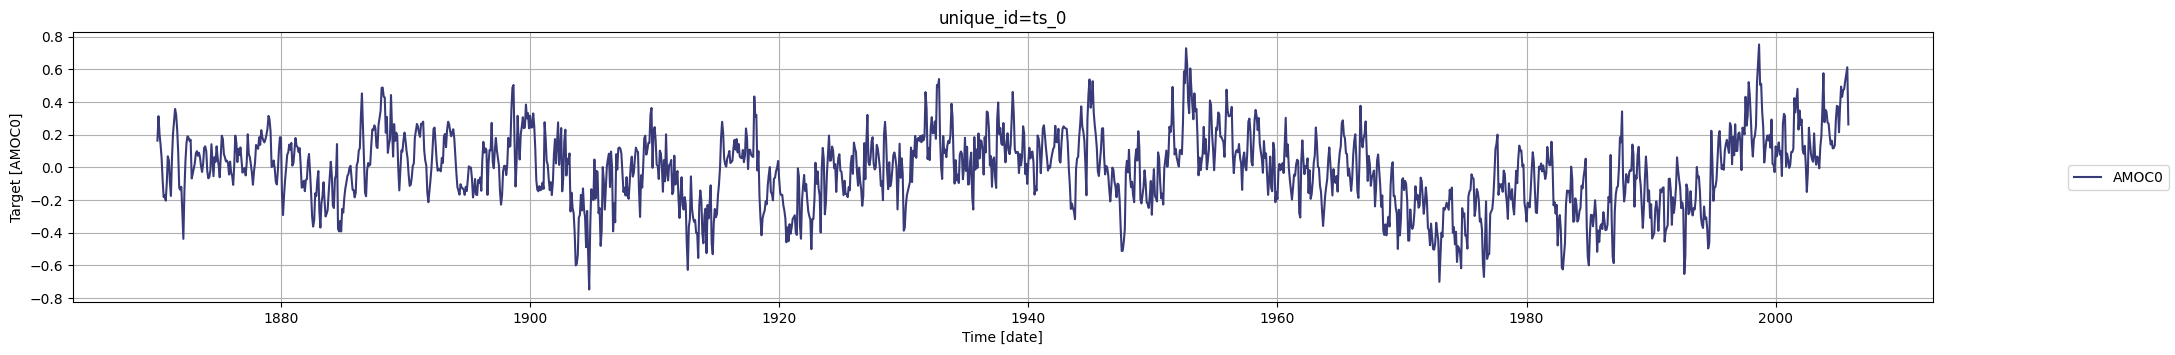

In [112]:
import matplotlib
import matplotlib.pyplot as plt

# plotting all data
nixtla_client.plot(df_train, time_col='date', target_col='AMOC0')

"In the context of monthly data, a period exceeding two years would typically be classified as long-horizon forecasting." URL: https://docs.nixtla.io/docs/forecasting_on_a_long_horizon

* **df**: A pandas dataframe containing the time series data.
* **h**: The number of steps ahead to forecast (in this case in months (MS = month start)).
* **freq**: The frequency of the time series in Pandas format. See pandas’ available frequencies (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
* **time_col**: Column that identifies the datestamp column.
* **target_col**: The variable that we want to forecast.

forecasting the next 12 months using the SDK forecast method:

# Forecasting accuracy 12 steps ahead

In [126]:
# forecasting 12 steps ahead
timegpt_fcst_df = nixtla_client.forecast(df=df_train, h=12, freq='MS', time_col='date', target_col='AMOC0')
timegpt_fcst_df

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...


,date,TimeGPT
0,2005-12-01,0.269994
1,2006-01-01,0.280878
2,2006-02-01,0.279755
3,2006-03-01,0.283919
4,2006-04-01,0.288689
5,2006-05-01,0.283427
6,2006-06-01,0.281977
7,2006-07-01,0.274517
8,2006-08-01,0.271429
9,2006-09-01,0.267371


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


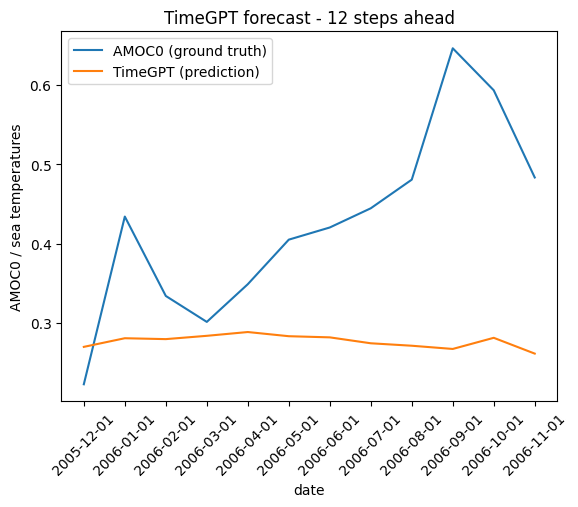

In [160]:
df_test_new = df_test[['date', 'AMOC0']]
df_test_new_12 = df_test_new[0:12]

# calculating the error between TimeGPT column in the forecast and the target column
timegpt_fcst_df_with_test = timegpt_fcst_df.join(df_test_new_12, lsuffix='_left', rsuffix='_right')
timegpt_fcst_df_with_test['error'] = timegpt_fcst_df_with_test['AMOC0'] - timegpt_fcst_df_with_test['TimeGPT']

print(timegpt_fcst_df_with_test)

# make a plot of the forecast (TimeGPT) and the target column (AMOC0) with dates on the x-axis and the two columns on the y-axis
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=timegpt_fcst_df_with_test, x='date_left', y='AMOC0', label='AMOC0 (ground truth)')
sns.lineplot(data=timegpt_fcst_df_with_test, x='date_left', y='TimeGPT', label='TimeGPT (prediction)')
plt.xlabel('date')
plt.ylabel('AMOC0 / sea temperatures')
plt.title('TimeGPT forecast - 12 steps ahead')
plt.xticks(rotation=45)
plt.show()

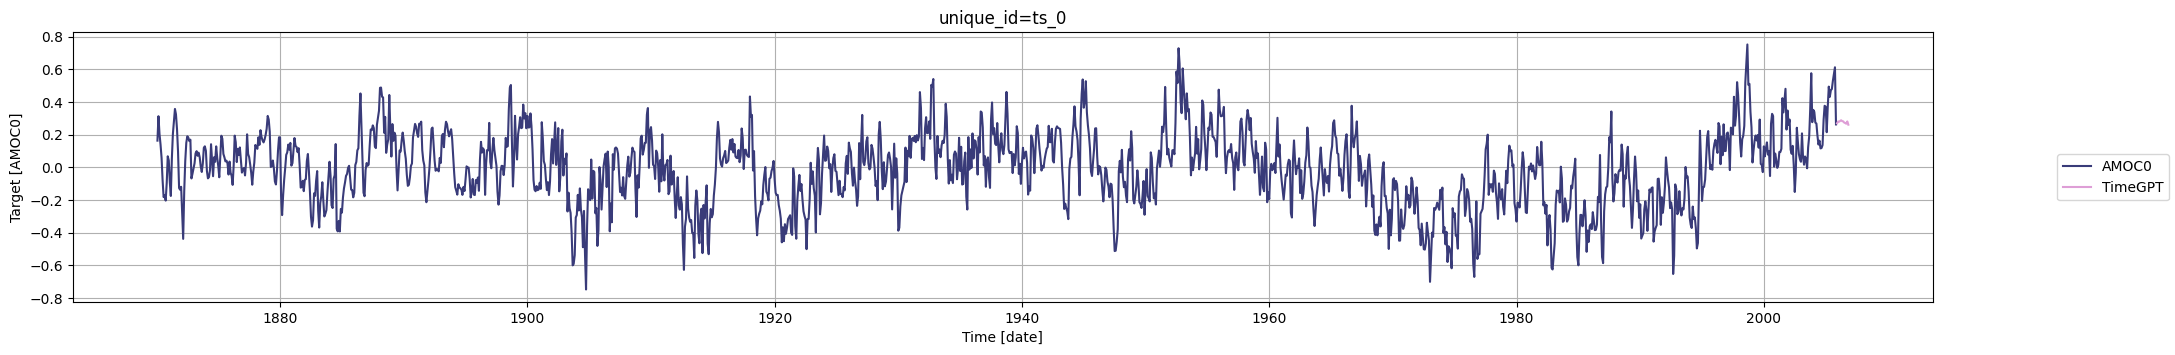

In [163]:
# same plot as above, this time with the forecast (lyserød streg til sidst)
nixtla_client.plot(df_train, timegpt_fcst_df, time_col='date', target_col='AMOC0')

# forecasting on 36 timesteps ahead

In [ ]:
# forecasting 36 steps ahead
timegpt_fcst_df = nixtla_client.forecast(df=df_train, h=36, freq='MS', time_col='date', target_col='AMOC0')
timegpt_fcst_df.head(4)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Dataframe with forecast and test data
    date_left   TimeGPT  date_right     AMOC0     error
0  2005-12-01  0.269994  2005-12-01  0.222866 -0.047128
1  2006-01-01  0.280878  2006-01-01  0.434150  0.153272
2  2006-02-01  0.279755  2006-01-31  0.334138  0.054382
3  2006-03-01  0.283919  2006-03-02  0.301449  0.017530
4  2006-04-01  0.288689  2006-04-02  0.348948  0.060259


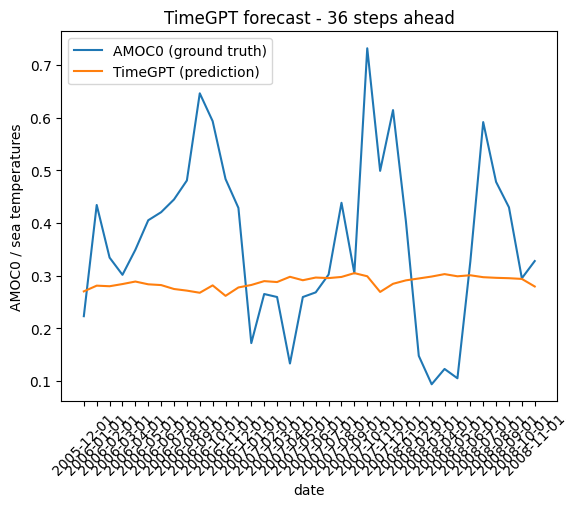

In [168]:
df_test_new_36 = df_test_new[0:36]

# calculating the error between TimeGPT column in the forecast and the target column
timegpt_fcst_df_with_test = timegpt_fcst_df.join(df_test_new_36, lsuffix='_left', rsuffix='_right')
timegpt_fcst_df_with_test['error'] = timegpt_fcst_df_with_test['AMOC0'] - timegpt_fcst_df_with_test['TimeGPT']

print("")
print("Dataframe with forecast and test data")
print(timegpt_fcst_df_with_test.head(5))

# make a plot of the forecast (TimeGPT) and the target column (AMOC0) with dates on the x-axis and the two columns on the y-axis
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=timegpt_fcst_df_with_test, x='date_left', y='AMOC0', label='AMOC0 (ground truth)')
sns.lineplot(data=timegpt_fcst_df_with_test, x='date_left', y='TimeGPT', label='TimeGPT (prediction)')
plt.xlabel('date')
plt.ylabel('AMOC0 / sea temperatures')
plt.title('TimeGPT forecast - 36 steps ahead')
plt.xticks(rotation=45)
plt.show()

# 128 time steps ahead

In [170]:
# forecasting 36 steps ahead
timegpt_fcst_df = nixtla_client.forecast(df=df_train, h=128, freq='MS', time_col='date', target_col='AMOC0')
timegpt_fcst_df.head(4)

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...


,date,TimeGPT
0,2005-12-01,0.269994
1,2006-01-01,0.280878
2,2006-02-01,0.279755
3,2006-03-01,0.283919


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Dataframe with forecast and test data
    date_left   TimeGPT  date_right     AMOC0     error
0  2005-12-01  0.269994  2005-12-01  0.222866 -0.047128
1  2006-01-01  0.280878  2006-01-01  0.434150  0.153272
2  2006-02-01  0.279755  2006-01-31  0.334138  0.054382
3  2006-03-01  0.283919  2006-03-02  0.301449  0.017530
4  2006-04-01  0.288689  2006-04-02  0.348948  0.060259


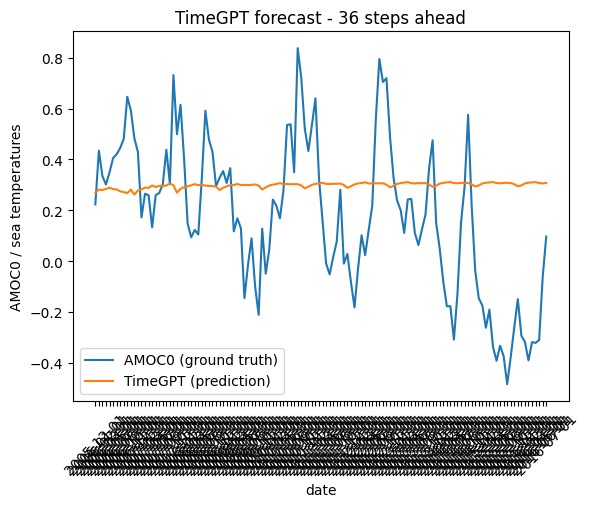

In [171]:
df_test_new_128 = df_test_new[0:128]

# calculating the error between TimeGPT column in the forecast and the target column
timegpt_fcst_df_with_test = timegpt_fcst_df.join(df_test_new_128, lsuffix='_left', rsuffix='_right')
timegpt_fcst_df_with_test['error'] = timegpt_fcst_df_with_test['AMOC0'] - timegpt_fcst_df_with_test['TimeGPT']

print("")
print("Dataframe with forecast and test data")
print(timegpt_fcst_df_with_test.head(5))

# make a plot of the forecast (TimeGPT) and the target column (AMOC0) with dates on the x-axis and the two columns on the y-axis
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=timegpt_fcst_df_with_test, x='date_left', y='AMOC0', label='AMOC0 (ground truth)')
sns.lineplot(data=timegpt_fcst_df_with_test, x='date_left', y='TimeGPT', label='TimeGPT (prediction)')
plt.xlabel('date')
plt.ylabel('AMOC0 / sea temperatures')
plt.title('TimeGPT forecast - 36 steps ahead')
plt.xticks(rotation=45)
plt.show()

More functionalities to look into:

1. Forecasting on long horizon: https://docs.nixtla.io/docs/forecasting_on_a_long_horizon
2. Prediction intervals, how uncertain is prediction "a prediction interval gives an estimated range within which a future observation will fall": https://docs.nixtla.io/docs/prediction_intervals
3. forecasting on irregular timestamps: https://docs.nixtla.io/docs/forecasting_time_series_with_irregular_timestamps
4. Cross validation: https://docs.nixtla.io/docs/cross_validation